# **Week 2**

## **Day 1**

##### **Linear Regression with Multiple Variables**

##### **Notation**

* n = number of features
* m = number of training examples
* $x_{j}^{(i)}$ = value of feature $j$ in the $i^{th}$ example
* $x^{(i)}$ = the column vector of all the feature inputs of the $i^{th}$ training example.

##### **Hypothesis Function**

Now we have multiple features so Our hypothesis Function will be:
> $h_{\theta}(x) = \theta_0 + \theta_1*x_1  + \theta_2*x_2 + ... + \theta_n*x_n $

> In order to develop intuition about this function, we can think about $\theta_0$ as the basic price of a house, $\theta_1$ as the price per square meter,$\theta_2$	as the price per floor, etc. $x_1$ will be the number of square meters in the house, $x_2$ the number of floors, etc.

> We can caluclate this cost function with the help of vectorization through  matrix multiplication:

> $X = 
\begin{bmatrix}
x_0^{(1)} & x_1^{(1)} & x_2^{(1)} & \dots & x_n^{(1)} \\
x_0^{(2)} & x_1^{(2)} & x_2^{(2)} & \dots & x_n^{(2)}  \\
x_0^{(3)} & x_1^{(3)} & x_2^{(3)} & \dots & x_n^{(3)}  \\
\vdots & \vdots & \vdots & \vdots & \vdots  \\
x_0^{(m)} & x_{1}^{(m)} & x_2^{(m)} & \dots & x_n^{(m)}
\end{bmatrix}$
> $\theta = 
\begin{bmatrix}
\theta_0 \\
\theta_1 \\
\theta_2 \\
\vdots \\
\theta_n
\end{bmatrix}$

> $h_{\theta}(x) = X*\theta$

> assume $x_{0}^{(i)}  =1 \text{ for }  (i\in { 1,\dots, m } )$

>So that we can do matrix operations with **theta** and **X**, we will set $x^{(i)}_0 = 1$, for all values of i. This makes the two vectors 'theta' and $x_{(i)}$ match each other element-wise (that is, have the same number of elements: n+1).]



###### **Code**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# m = number of examples
# n = number of features
def multiple_data_generate(m, n):
  np.random.seed(42)
  X = np.random.random((m,n))*10 # m*n Matrix generated
  y = np.array(range(m)).reshape(-1,1) # m*1 vector generated
  theta = np.random.random((n+1,1)) # n+1*1 vector generated (+1 because of bais term theta(0))
  return X,y,theta


m = 10
n = 3
X,y,theta = multiple_data_generate(m,n)

# Add bais Ter infron of X (input matrix)
def add_bais(X):
  return np.insert(X,0,1,axis=1)
Xbais = add_bais(X) 

# Vectorize Hypothesis Function
def hyp_function(X,theta):
  return np.dot(X,theta)

h = hyp_function(Xbais,theta)
print(f"hypothesis:\n{h}")

hypothesis:
[[ 8.81046556]
 [ 3.21010404]
 [ 6.97394621]
 [11.03170426]
 [ 3.89050116]
 [ 6.0975461 ]
 [ 7.33934813]
 [ 4.51181483]
 [ 3.79069931]
 [ 2.31057498]]


##### **Cost Function**

No we have multiple features so our cost function will be:
> The vectorized version is:

> $J(\theta) = \dfrac {1}{2m} (X\theta - \vec{y})^{T} (X\theta - \vec{y})$

>Note: $\sum_{i=0}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2  = (X\theta - \vec{y})^{T} (X\theta - \vec{y})$

###### **Code**

In [2]:
def Cost_function(h,y):
  error = h-y
  sum_sqr_error = np.dot(error.T,error)  # This is method to square and summation
  J = 1/(2*m) * sum_sqr_error
  return J

J = Cost_function(h,y)
print(f"Cost:{float(J)}")

Cost:12.171270656686787


## **DAY 2**

##### **Gradient Descent For multivariate Linear Regression**

It's generaly have the same form as univariate linear Regression,  we just have to repeat it for our $n feautres$.

$Repeat \{\\
\theta_{0} := \theta_{0}-\alpha*\frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})\\
\theta_{1} := \theta_{1}-\alpha*\frac{1}{m}\sum_{i=1}^{m}((h_{\theta}(x^{(i)})-y^{(i)})x_1^{(i)}) \\
\theta_{2} := \theta_{2}-\alpha*\frac{1}{m}\sum_{i=1}^{m}((h_{\theta}(x^{(i)})-y^{(i)})x_2^{(i)}) \\
\vdots \\
\theta_{n} := \theta_{n}-\alpha*\frac{1}{m}\sum_{i=1}^{m}((h_{\theta}(x^{(i)})-y^{(i)})x_n^{(i)}) \\
\}$

In others Words

> $ Repeat \{ \\
\theta_{j} := \theta_{j}-\alpha*\frac{1}{m}\sum_{i=1}^{m}((h_{\theta}(x^{(i)})-y^{(i)})x_j^{(i)}) \\
for(j := 0\dots n)\\
\}$

###### **Vectorize form of gradient Descent**

$X = 
\begin{bmatrix}
x_0^{(1)} & x_1^{(1)} & x_2^{(1)} & \dots & x_n^{(1)} \\
x_0^{(2)} & x_1^{(2)} & x_2^{(2)} & \dots & x_n^{(2)}  \\
x_0^{(3)} & x_1^{(3)} & x_2^{(3)} & \dots & x_n^{(3)}  \\
\vdots & \vdots & \vdots & \vdots & \vdots  \\
x_0^{(m)} & x_{1}^{(m)} & x_2^{(m)} & \dots & x_n^{(m)}
\end{bmatrix}
\theta = 
\begin{bmatrix}
\theta_0 \\
\theta_1 \\
\theta_2 \\
\vdots \\
\theta_n
\end{bmatrix}\\
$

>$
\theta := \theta - \frac{\alpha}{m} * X^T(X\theta-y)
$

###### **Code**

In [3]:
def Gradient_Descent(X, y, theta, alpha=0.01, itr=10):
  J_history = []
  theta_values = []
  counter = 0
  while counter < itr:
    h = hyp_function(Xbais,theta) # Hypothesis Function
    J = Cost_function(h, y) # Cost  function
 
    theta = theta - (alpha/m) * np.dot(X.T,(h - y)) # Vectorize Form  
    
    J_history.append(float(J)) # Save Cost History
    counter +=1
 
  # Plot Graph Cost Function Vs. Iteration
  plt.plot(range(len(J_history)),J_history,'r')
  plt.xlabel('Iteration')
  plt.ylabel('Cost')
  plt.grid(True)
  plt.show(True)
 
  return theta, J_history

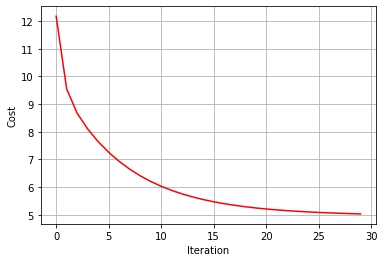

Cost: 5.032000432539577 
theta:
[[ 0.75121869]
 [ 0.44955671]
 [ 0.33312659]
 [-0.04156719]]


In [4]:
# alpha = 0.01
m=10
n=3
X,y,theta = multiple_data_generate(m, n) # Generate Data (m=examples,n=features)
Xbais = add_bais(X)
itr = 30
alpha= 0.01
theta, J_history= Gradient_Descent(Xbais, y, theta, alpha, itr)
print(f"Cost: {J_history[-1]} \ntheta:\n{theta}")

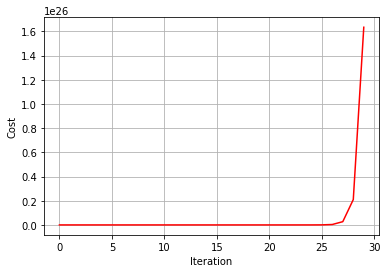

Cost: 1.6348053140445032e+26 
theta:
[[7.69133005e+11]
 [3.32114144e+12]
 [3.81343545e+12]
 [3.76638414e+12]]


In [5]:
# alpha = 0.06
m=10
n=3
X,y,theta = multiple_data_generate(m, n) # Generate Data (m=examples,n=features)
Xbais = add_bais(X)
itr = 30
alpha= 0.06
theta, J_history= Gradient_Descent(Xbais, y, theta, alpha, itr)
print(f"Cost: {J_history[-1]} \ntheta:\n{theta}")

Note: Carefull examine Both Graph when we tweek little bit on value of alpha from 0.01 to 0.03 it's start to diverge and cost will rapidly increase as shown in figure above, this is because we have input values in large range e.g (0 to 9) we need to scale it down to Run gradient descent on large value of alpha, that's why we need Feature Normaization.  

## **Day 3**

##### **Feature Nortmalization**

**Idea**: We can speed up gradient descent by having each of our input values in roughly the same range. This is because $\theta$ will descend quickly on small ranges and slowly on large ranges

The way to prevent this is to modify the ranges of our input variables so that they are all roughly the same. Ideally:

$−1 ≤ x_{(i)} ≤ 1
\\
or \\
−0.5 ≤ x_{(i)} ≤ 0.5
$ 


Two techniques to help with this are **Normalization** and **Standardization**.

**Normalization**: involves dividing the input values by the range (i.e. the maximum value minus the minimum value) of the input variable.

$X^{'} := \frac{X-X_{min}}{X_{max}-X_{min}}$

**Standardization**: involves subtracting the average value for an input variable from the values for that input variable.

$X^{'} := \frac{X-\mu}{std(X)}$

$ \mu $ is an average of X and std(x) is standard deviation of an X.

read more about it -> https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

###### **Code**

In [6]:
# Normalization
def Normalization(X):
  Xarray = []
  sigma = []
  mu = []
  for i in range(X.shape[1]):
    mu.append(np.min(X[:,i]))
    sigma.append(np.max(X[:,i] )-np.min(X[:,i]))
    Xarray.append((X[:,i]-mu[i])/(sigma[i]))
  return np.array(Xarray).T,mu,sigma

# Standarization
def Standarization(X):
  Xarray = []
  sigma = []
  mu = []
  for i in range(X.shape[1]):
    mu.append(np.min(X[:,i]))
    sigma.append(np.std(X[:,i]))
    Xarray.append((X[:,i]-mu[i])/(sigma[i]))
  return np.array(Xarray).T,mu,sigma

##### **Important to store the values used for Un seen $x$**

When normalizing the features, it is important to store the values used for normalization - the **mean value** and the **standard deviation** used for the computations. After learning the parameters from the model, we often want to **predict the value we have not seen before**. Given a new $x$ value, we must first normalize $x$ using the mean and standard deviation that we had previously computed from the training set.

In [7]:
# Range Between 0 and 1
Xnorm,mu,sigma = Normalization(X)
print(f"Xnorm:\n{Xnorm}")

Xnorm:
[[0.40866897 1.         0.74236453]
 [0.69809333 0.14560779 0.11862363]
 [0.         0.90911144 0.60063775]
 [0.83938966 0.         1.        ]
 [1.         0.20615898 0.14659502]
 [0.16183823 0.30496576 0.51795022]
 [0.48280112 0.29097513 0.61226564]
 [0.10513243 0.29195941 0.34642716]
 [0.51395587 0.82202662 0.16592323]
 [0.58906891 0.61478523 0.        ]]


In [8]:
# Values are Centerd arround mean
# with a unit of standard deviation
Xstd,mu,sigma = Standarization(X)
print(f"Xstd:\n{Xstd}")

Xstd:
[[1.334762   3.00961573 2.43274378]
 [2.28005676 0.43822349 0.38873206]
 [0.         2.73607609 1.96830222]
 [2.74154759 0.         3.27702051]
 [3.26612026 0.62045932 0.48039489]
 [0.52858313 0.91782976 1.69733349]
 [1.57688652 0.87572334 2.00640705]
 [0.34337517 0.87868564 1.13524891]
 [1.67864169 2.47398425 0.54373381]
 [1.92396989 1.85026731 0.        ]]


Now lets See that Our Algorithm Coverge More Quickly than Unscale features. 

###### **Code**

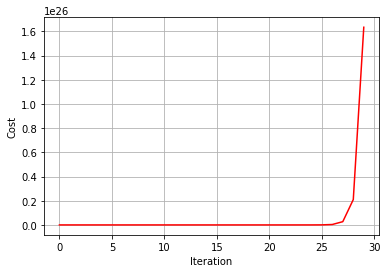

Cost: 1.6348053140445032e+26 
theta:
[[7.69133005e+11]
 [3.32114144e+12]
 [3.81343545e+12]
 [3.76638414e+12]]


In [9]:
# Unscaled Feature (Note: Cost Values is increasing on every iteration)
# at alpha 0.06
m=10
n=3
X,y,theta = multiple_data_generate(m, n) # Generate Data (m=examples,n=features)
Xbais = add_bais(X)
itr = 30
alpha= 0.06
theta, J_history= Gradient_Descent(Xbais, y, theta, alpha, itr)
print(f"Cost: {J_history[-1]} \ntheta:\n{theta}")

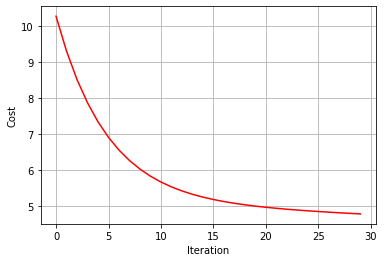

Cost: 4.774822513175425 
theta:
[[2.80723692]
 [1.08664404]
 [0.93990783]
 [0.96656187]]


In [10]:
# scaled Feature (Normalization)
# (Note: Cost Values is decreasing on every iteration)
# at alpha 0.06
m=10
n=3
X,y,theta = multiple_data_generate(m, n) # Generate Data (m=examples,n=features)

# Normalization
Xscaled,mu,sigma = Normalization(X)

# Standarization (Uncomment to use Standarizsation)
# Don't forget to comment Normalization :)
#Xscaled,mu,sigma = Standarization(X)

Xbais = add_bais(Xscaled)
itr = 30
alpha= 0.06
theta, J_history= Gradient_Descent(Xbais, y, theta, alpha, itr)
print(f"Cost: {J_history[-1]} \ntheta:\n{theta}")

##### **Gradient Descent Tips**

> **Debugging gradient descent**. Make a plot with number of iterations on the x-axis. Now plot the cost function, $J(\theta)$ over the number of iterations of gradient descent. If $J(\theta)$ ever increases, then you probably need to decrease $\alpha$.

> It has been proven that if learning rate α is sufficiently small, then J(θ) will decrease on every iteration. Andrew Ng recommends decreasing α by multiples of 3

##### **Usefull tip about Features**

> We can **combine** multiple features into one. For example, we can combine $x_1$ and $x_2$ into a new feature $x_3$ by taking $x_1⋅x_2$, e.g (width and lenght) multiply them it becomes area.

##### **Polynomial Regression**

So Now we have a problem When our data is not in linear, Linear Regression will fail to fit it, That's why we need polynomial Regression.

We can **change the behavior or curve** of our hypothesis function by making it a quadratic, cubic or square root function (or any other form).

**Diffrent hypothesis Functions**
* Straight Line ($h_{\theta}(x) = \theta_0 + \theta_1*x_1$)
* Quadratic function ($h_{\theta}(x) = \theta_0 + \theta_1*x_1 + \theta_2*x_1^2 $)
* Cubic function ($h_{\theta}(x) = \theta_0 + \theta_1*x_1 + \theta_2*x_1^2 + \theta_3*x_1^3 $)
* Square Root function ($h_{\theta}(x) = \theta_0 + \theta_1*x_1 + \theta_2*\sqrt{x_1} $)

In the Polynomial version, we have created new features $x_2$ and $x_3$ where $x_2 = x_1^2$ and $x_3=x_1^3$

**One important thing** to keep in mind is, if you choose your features this way then feature scaling becomes very important.
​	
 .


###### **Code**

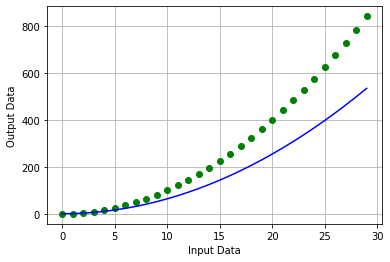

Cost:9857.548008015234


In [11]:
m=30
X = np.array(range(m)).reshape(-1,1)
X = np.insert(X,1,np.power(X,2).T,axis=1) # Making Extra feautre with square of 1st feature
y = np.array(np.power(range(m),2)).reshape(-1,1) # Or label data is in square fucntion
np.random.seed(10)

# Now theta will be 3*1 becuase we create new feature by using sqr(x_1) 
theta = np.random.random((X.shape[1]+1,1))

Xbais = add_bais(X)
h = hyp_function(Xbais,theta)

# Plot X,y Graph
plt.plot(X[:,0],y,'go')
plt.plot(X[:,0],h,'b')
plt.xlabel('Input Data')
plt.ylabel('Output Data')
plt.grid(True)
plt.show(True)

J = Cost_function(h,y)
print(f"Cost:{float(J)}")

**Now we have to fit our "Hypothesis" in it**

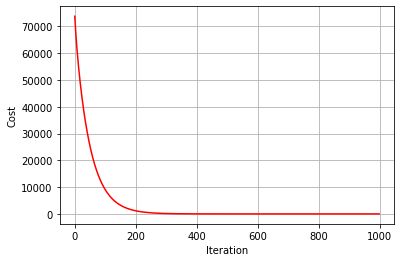

Cost: 9.757972919904469e-05 
theta:
[[-1.08727120e-02]
 [ 2.38827140e-02]
 [ 2.59752202e+02]]


In [12]:
# Normalization
Xscaled,mu,sigma = Standarization(X)
# Add bais Term
Xbais = add_bais(Xscaled)

np.random.seed(10)
theta = np.random.random((X.shape[1]+1,1))

itr = 999
alpha= 0.3
theta, J_history= Gradient_Descent(Xbais, y, theta, alpha, itr)
print(f"Cost: {J_history[-1]} \ntheta:\n{theta}")

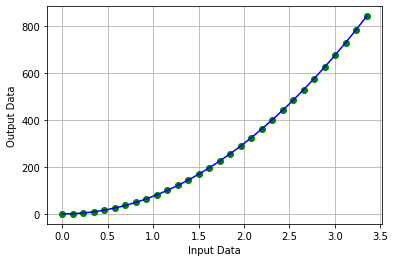

In [13]:
h = hyp_function(Xbais,theta)

# Plot X,y Graph
plt.plot(Xbais[:,1],y,'go')
plt.plot(Xbais[:,1],h,'b')
plt.xlabel('Input Data')
plt.ylabel('Output Data')
plt.grid(True)
plt.show(True)

###### **For unseen Value**

In [14]:
v = 88
X = np.array([[v,np.square(v)]])
Xchanged = (X-mu)/sigma # Previous Saved mu and sigma
Xbais = add_bais(Xchanged)
pred = Xbais.dot(theta)
if(round(float(pred)) == np.square(v)): # predicted value is round because of some approximation error
  print(f"square of {v} is: appoximated values {float(pred)} Correct Prediction")


square of 88 is: appoximated values 7743.730851492523 Correct Prediction


**That's How we fix polynomial Function in our dataset**

##### **Normal Equation**

Normal Equation is an **analytical approach** to Linear Regression with a Least Square Cost Function. We can directly find out the value of $\theta$ without using Gradient Descent.

> $\theta = (X^TX)^{-1}X^Ty$

There is **no need to do feature scaling** with the normal equation.

Mathematical proof of the Normal equation: https://eli.thegreenplace.net/2014/derivation-of-the-normal-equation-for-linear-regression

###### **Gradient Descent Vs. Normal Equation**

**Gradient Descent**

1.  Need to choose $\alpha$
2.  Need Many Iterations
3.  Complexity ($O(kn^2)$)
4.  Works well when $n$ is large 

**Normal Equation**

1.  No need to choose $\alpha$
2.  No need to Iterate
3.  Complexity ($O(n^3)$)
4.  Slow when $n$ is large. 

###### **Code**

In [15]:
m=10
n=3
X = np.array(range(m)).reshape(-1,1)
X = np.insert(X,1,np.power(X,2).T,axis=1) # Making Extra feautre with square of 1st feature
y = np.array(np.power(range(m),2)).reshape(-1,1) # Or label data is in square fucntion

Xbais = add_bais(X)

# Normal Equation
inverse = np.linalg.inv(np.dot(Xbais.T,Xbais))
temp = np.dot(Xbais.T,y)
theta = np.dot(inverse,temp)

h = hyp_function(Xbais,theta)
J = Cost_function(h,y)
print(f"theta:\n{theta}\n\nCost:{float(J)}")

theta:
[[-5.60523850e-14]
 [-1.77011183e-14]
 [ 1.00000000e+00]]

Cost:2.770954520127327e-27


**for unseen Value (Normal Equation)**

In [16]:
v = 88
X = np.array([[v,np.square(v)]])
Xbais = add_bais(X)
pred = Xbais.dot(theta)
if(round(float(pred)) == np.square(v)):  # predicted value is round because of some approximation error
  print(f"square of {v} is: appoximated values {float(pred)} Correct Prediction")

square of 88 is: appoximated values 7744.0000000000155 Correct Prediction


Let's Look at the value of Cost, it's will definitly less than gradient descent method, this is because we limit out iteration to 30.

###### **Non-invertiblity**

$X^TX$ may be non-invertible. The common causes are:

* **Redundant features**: where two features are very closely related (i.e. they are linearly dependent)
* **Too many features (e.g. m ≤ n)**: In this case, delete some features or use "regularization" (to be explained in a later lesson).

Solutions to the above problems include deleting a feature that is linearly dependent with another or deleting one or more features when there are too many features.

##### **Fact About Regrssion**

https://blog.minitab.com/blog/statistics-and-quality-data-analysis/so-why-is-it-called-regression-anyway